## groupby()


#### groupby()와 함께 사용하는 집계 메소드

- count : 누락값을 제외한 데이타 수를 반환
- size : 누락값을 포함한 데이타 수를 반환
- sum
- mean
- std
- var
- min
- max
- quantile(q=0.25)
- quantile(q=0.50)
- quantile(q=0.75)
- describe
- first
- last
- nth   : n번째 행 반환
- sem   : 평균의 표준편차 반환

In [11]:
import pandas as pd

df = pd.read_excel('data/고속버스.xlsx') 


,차종,선별,출발지,도착지,거리,총운행횟수,총이용인원,이용율
0,우등,88선,광주,울산,327.8,412,7283,63.1
1,고속,88선,광주,울산,327.8,145,3050,46.7
2,우등,88선,광주,울산신복,327.8,164,545,11.9
3,고속,88선,광주,울산신복,327.8,70,311,9.9
4,우등,88선,광주,동대구,219.3,1369,21873,57.1
...,...,...,...,...,...,...,...,...
346,고속,호남선,청주,광주,207.5,268,4858,40.3
347,고속,호남선,청주시외,여수,290.1,21,513,54.3
348,우등,호남선,광주,전주,105.9,1802,34137,67.7
349,고속,호남선,광주,전주,105.9,1043,30394,64.8


,차종,출발지,도착지,거리,총운행횟수,총이용인원,이용율
선별,,,,,,,
88선,18,18,18,18,18,18,18
경부선,105,105,105,105,105,105,105
경인선,25,25,25,25,25,25,25
구마선,30,30,30,30,30,30,30
남해선,21,21,21,21,21,21,21
동해선,4,4,4,4,4,4,4
영동선,26,26,26,26,26,26,26
호남선,122,122,122,122,122,122,122


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 47560 missing from c

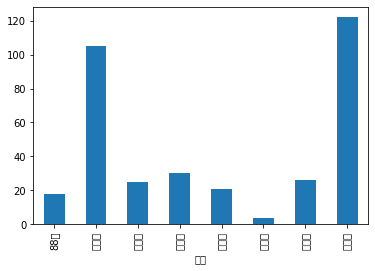

In [14]:
# 그룹화 - '선별' 단위로 각각의 노선에 대한 총 갯수
df_group=df.groupby('선별')

type(df_group)
df_group2 = df_group.count()
df_group2
df_group2.sort_values(by='선별')


df_group2

In [16]:
%matplotlib inline

# 한글처리
from matplotlib import rc
rc('font', family='Malgun Gothic')

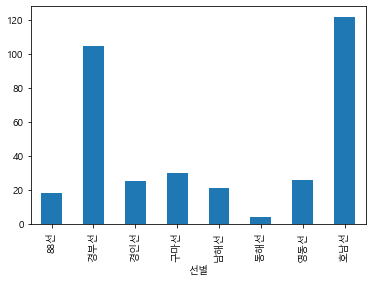

In [17]:
# 노선별 수에 대한 그래프
df_group2['차종'].plot(kind='bar')

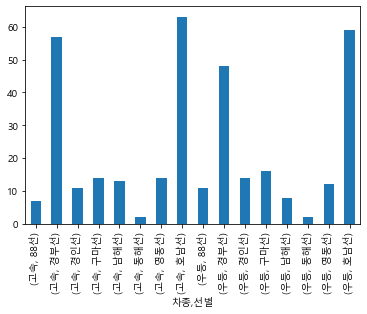

In [29]:
# 차종별, 노선별별 그룹화 작업

#df_group3=df.groupby(['차종', '선별']).sum()
#df_group3=df.groupby(['차종', '선별']).mean()
result=df.groupby(['차종', '선별'])['총이용인원'].count().plot(kind='bar')

In [32]:
# 교차테이블(cross tab) - 엑셀의 Pivot 유사

result2 = pd.crosstab(df['차종'], df['선별']) # 첫번째 인자가 자동으로 index가 됨, 두번째 인자가 자동으로 column이 됨
result2

선별,88선,경부선,경인선,구마선,남해선,동해선,영동선,호남선
차종,,,,,,,,
고속,7,57,11,14,13,2,14,63
우등,11,48,14,16,8,2,12,59


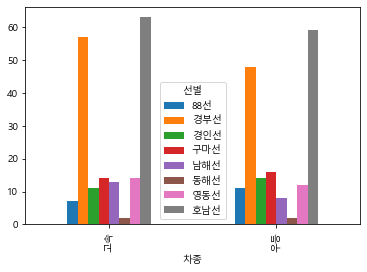

In [35]:
result2.plot(kind='bar')

In [36]:
result3 = pd.crosstab(df['차종'], df['선별'], margins=True) # 합산이 추가됨
result3

선별,88선,경부선,경인선,구마선,남해선,동해선,영동선,호남선,All
차종,,,,,,,,,
고속,7,57,11,14,13,2,14,63,181
우등,11,48,14,16,8,2,12,59,170
All,18,105,25,30,21,4,26,122,351


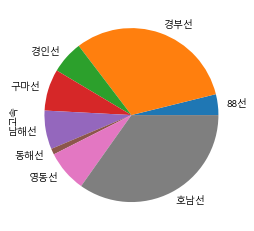

In [42]:
# 원 그래프로 그릴 경우에는 하나씩 뽑아야됨

result2.loc['고속'].plot(kind='pie')

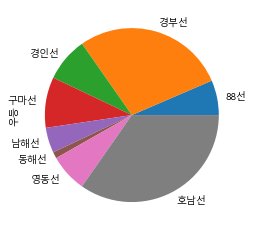

In [43]:
result2.loc['우등'].plot(kind='pie')